In [ ]:
%%HTML
<style>
    body {
        --vscode-font-family: "Inter";
    }
</style>


<center>
<h1 style="font-size: 50px; font-weight: bold; color:sandybrown">OC SWITRS Data Processing</h1>

<div style="font-size: 40px; font-weight: bold; color: sandybrown">Part 03: ArcGIS Online Operations</div>
<div style="font-size: 30px; font-weight: bold; color: sandybrown">v.5, August 2024</div>
</center>

---

## <font color="orangered">**Referencing Libraries and Initialization**</font>

### <font color="lime">**Preliminaries**</font>

Instantiating python libraries for the project

In [ ]:
# Import Python libraries
import os, json, pytz, math, arcpy, arcgis
from datetime import date, time, datetime, timedelta, tzinfo, timezone
from tqdm.notebook import trange, tqdm, tqdm_notebook
from arcpy import metadata as md
from arcgis.gis import GIS
from arcgis.mapping import WebMap
from arcgis.features import FeatureLayer


### <font color="lime">**Project and Workspace Variables**</font>

Define and maintain project, workspace, ArcGIS, and data-related variables.

Project and ArcGIS Pro project paths

In [59]:
# Environment variables for OneDrive path
oneDrivePath = os.getenv("OneDriveCommercial")

# OC SWITRS project path
projectPath = os.path.join(oneDrivePath, "Projects", "OCTraffic", "OCSWITRS")

# OC SWITRS ArcGIS Pro project path
agpPath = os.path.join(projectPath, "AGPSWITRS")


ArcGIS Pro-related paths

In [ ]:
# ArcGIS Pro project name and path
aprx = "AGPSWITRS.aprx"
aprxPath = os.path.join(agpPath, aprx)

# ArcGIS Pro project geodatabase and path
gdb = "AGPSWITRS.gdb"
gdbPath = os.path.join(agpPath, gdb)

# Current ArcGIS workspace (arcpy)
arcpy.env.workspace = gdbPath
workspace = arcpy.env.workspace

# Enable overwriting existing outputs
arcpy.env.overwriteOutput = True


Project folder paths

In [61]:
# Raw data folder path
rawDataPath = os.path.join(projectPath, "RawData")

# Layers folder path
layersPath = os.path.join(projectPath, "Layers")

# Notebooks folder path
notebooksPath = os.path.join(projectPath, "Notebooks")

# Supporting data path on the project geodatabase (feature directory)
supportingDataPath = os.path.join(workspace, "SupportingData")


Data folder paths and contents

In [62]:
# Paths to raw data (crashes, parties, victims)
rawCrashesPath = os.path.join(rawDataPath, "Crashes.csv")
rawPartiesPath = os.path.join(rawDataPath, "Parties.csv")
rawVictimsPath = os.path.join(rawDataPath, "Victims.csv")

# Path to JSON codebook
codebookPath = os.path.join(rawDataPath, "codebook.json")

# Paths to supporting data (feature classes)
boundariesPath = os.path.join(supportingDataPath, "OCSWITRS_Boundaries")
citiesPath = os.path.join(supportingDataPath, "OCSWITRS_Cities")
roadsPath = os.path.join(supportingDataPath, "OCSWITRS_Roads")
lookupPath = os.path.join(supportingDataPath, "OCSWITRS_Lookup")

# Paths to saved dataframe pickles (crashes, parties, victims, collisions)
dfCrashesPickle = os.path.join(rawDataPath, "dfCrashes.pkl")
dfPartiesPickle = os.path.join(rawDataPath, "dfParties.pkl")
dfVictimsPickle = os.path.join(rawDataPath, "dfVictims.pkl")
dfCollisionsPickle = os.path.join(rawDataPath, "dfCollisions.pkl")

# Paths to saved excel files (crashes, parties, victims, collisions) ready to be imported to ArcGIS Pro
dfCrashesExcel = os.path.join(rawDataPath, "dfCrashes.xlsx")
dfPartiesExcel = os.path.join(rawDataPath, "dfParties.xlsx")
dfVictimsExcel = os.path.join(rawDataPath, "dfVictims.xlsx")
dfCollisionsExcel = os.path.join(rawDataPath, "dfCollisions.xlsx")


Display all information about paths, folders, and data files

In [ ]:
# Display all information
print("Key Project Information")
print(f"\n\t- Name {aprx}\n\t- Path: {aprxPath}\n\t- Project Path: {projectPath}\n\t- Workspace: {workspace}\n\t- Geodatabase: {gdb}\n\t- Geodatabase Path: {gdbPath}")
print("\nProject Directories:")
print(f"\n\t- Raw Data: {rawDataPath}\n\t- Layers: {layersPath}\n\t- Notebooks: {notebooksPath}\n\t- Supporting Data: {supportingDataPath}")
print("\nSupporting Feature Classes:")
print(f"\n\t- Boundaries: {boundariesPath}\n\t- Cities: {citiesPath}\n\t- Roads: {roadsPath}\n\t- Lookup: {lookupPath}")
print("\nOther Supporting Data")
print(f"\n\t- Codebook: {codebookPath}\n\t- Raw Data Files:\n\t\t- Crashes: {rawCrashesPath}\n\t\t- Parties: {rawPartiesPath}\n\t\t- Victims: {rawVictimsPath}")
print(f"\n\t- Saved datafram Pickles:\n\t\t- Crashes: {dfCrashesPickle}\n\t\t- Parties: {dfPartiesPickle}\n\t\t- Victims: {dfVictimsPickle}\n\t\t- Collisions: {dfCollisionsPickle}")
print(f"\n\t- Saved Excel dataframes:\n\t\t- Crashes: {dfCrashesExcel}\n\t\t- Parties: {dfPartiesExcel}\n\t\t- Victims: {dfVictimsExcel}\n\t\t- Collisions: {dfCollisionsExcel}")


Key Project Information

	- Name AGPSWITRS.aprx
	- Path: D:\OneDriveOCPW\Projects\OCTraffic\OCSWITRS\AGPSWITRS\AGPSWITRS.aprx
	- Project Path: D:\OneDriveOCPW\Projects\OCTraffic\OCSWITRS
	- Workspace: D:\OneDriveOCPW\Projects\OCTraffic\OCSWITRS\AGPSWITRS\AGPSWITRS.gdb
	- Geodatabase: AGPSWITRS.gdb
	- Geodatabase Path: D:\OneDriveOCPW\Projects\OCTraffic\OCSWITRS\AGPSWITRS\AGPSWITRS.gdb

Project Directories:

	- Raw Data: D:\OneDriveOCPW\Projects\OCTraffic\OCSWITRS\RawData
	- Layers: D:\OneDriveOCPW\Projects\OCTraffic\OCSWITRS\Layers
	- Notebooks: D:\OneDriveOCPW\Projects\OCTraffic\OCSWITRS\Notebooks
	- Supporting Data: D:\OneDriveOCPW\Projects\OCTraffic\OCSWITRS\AGPSWITRS\AGPSWITRS.gdb\SupportingData

Supporting Feature Classes:

	- Boundaries: D:\OneDriveOCPW\Projects\OCTraffic\OCSWITRS\AGPSWITRS\AGPSWITRS.gdb\SupportingData\OCSWITRS_Boundaries
	- Cities: D:\OneDriveOCPW\Projects\OCTraffic\OCSWITRS\AGPSWITRS\AGPSWITRS.gdb\SupportingData\OCSWITRS_Cities
	- Roads: D:\OneDriveOCPW\Project

Define ArcGIS Pro project and map list

In [64]:
# Current ArcGIS Pro project
aprx = arcpy.mp.ArcGISProject(aprxPath)

# Current ArcGIS Pro project map
map = aprx.listMaps()[0]


Define ArcGIS Map Layers and List

In [65]:
# Define variables for each of the map layers in the ArcGIS Pro project
crashesLyr = map.listLayers("OCSWITRS Crashes")[0]
partiesLyr = map.listLayers("OCSWITRS Parties")[0]
victimsLyr = map.listLayers("OCSWITRS Victims")[0]
collisionsLyr = map.listLayers("OCSWITRS Collisions")[0]
citiesLyr = map.listLayers("OCSWITRS Cities")[0]
roadsLyr = map.listLayers("OCSWITRS Roads")[0]

# List of the main data layers in the ArcGIS Pro project
dataLyrList = [crashesLyr, partiesLyr, victimsLyr, collisionsLyr]
# List of the supporting data layers in the ArcGIS Pro project
supportingLyrList = [citiesLyr,roadsLyr]


## <font color="orangered">**Exporting Layers to ArcGIS Online (AGO)**</font>

## <font color="orangered">**Visualizing ArcGIS Online Published Data**</font>

Preliminaries for visualizing ArcGIS Online published data

In [66]:
# Create a GIS object
gis = GIS("pro")


<User username:ktalexan>
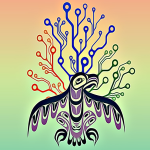

In [67]:
gis.users.me


In [68]:
map_search = gis.content.search(query="SWITRS", item_type="Web Map", max_items=10)
map_search


[<Item title:"OCSWITRS Historical Collisions Map" type:Web Map owner:ktalexan>,
 <Item title:"OCSWITRS Crashes Map" type:Web Map owner:ktalexan>,
 <Item title:"OCSWITRS Collisions App Map" type:Web Map owner:ktalexan>,
 <Item title:"OCSWITRS Parties Map" type:Web Map owner:ktalexan>,
 <Item title:"OCSWITRS Victims Map" type:Web Map owner:ktalexan>]

<Item title:"OCSWITRS Crashes Map" type:Web Map owner:ktalexan>
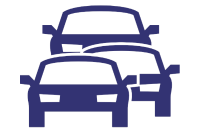

In [70]:
web_item= map_search[1]
web_item


In [71]:
from arcgis.mapping import WebMap
ocswitrs_webmap = WebMap(web_item)
ocswitrs_webmap


MapView(hide_mode_switch=True, layout=Layout(height='400px', width='100%'))

In [77]:
item = gis.content.get("5bc8a27565da4bb68e94dc5e4a402b80")
flayer = item.layers[0]


In [78]:
import pandas as pd
from arcgis.features import GeoAccessor, GeoSeriesAccessor


In [79]:
sdf = pd.DataFrame.spatial.from_layer(flayer)


In [80]:
sdf.head()


,OBJECTID,index_,recordDate,recordTime,recordEpoch,district,locationName,nearbyPlace,longitude,latitude,...,postmile,alignment,milepost,inService,imageDescription,streamingVideoURL,currentImageUpdateFrequency,currentImageURL,referenceImageUpdateFrequency,SHAPE
0,1,1,2023-06-01,10:03:30,1685639010,12,I-5 : North of Magnolia Avenue (South Of SR-91),Anaheim,-117.97886,33.85629,...,42.11,L,114.08,TRUE,<NA>,https://wzmedia.dot.ca.gov/D12/SB5MagnoliaAveS...,5,https://cwwp2.dot.ca.gov/data/d12/cctv/image/i...,<NA>,"{""x"": -13133346.6196, ""y"": 4009521.5688999966,..."
1,2,2,2020-08-07,12:30:14,1596828614,12,SR-91 : Beach Boulevard,Buena Park,-117.99698,33.85631,...,2.67,<NA>,17.41,TRUE,<NA>,<NA>,5,https://cwwp2.dot.ca.gov/data/d12/cctv/image/s...,<NA>,"{""x"": -13135363.7287, ""y"": 4009524.2498999983,..."
2,3,3,2023-10-18,14:27:07,1697664427,12,SR-57 : SR-22,Anaheim,-117.875531,33.849091,...,15.55,<NA>,4.82,TRUE,<NA>,https://wzmedia.dot.ca.gov/D12/NB57NO_RTE22.st...,5,https://cwwp2.dot.ca.gov/data/d12/cctv/image/s...,<NA>,"{""x"": -13121844.0879, ""y"": 4008556.589400001, ..."
3,4,4,2020-12-14,13:39:35,1607981975,12,SR-91 : Scale House,Anaheim,-117.755142,33.868618,...,13.81,R,32.18,TRUE,<NA>,<NA>,5,https://cwwp2.dot.ca.gov/data/d12/cctv/image/s...,<NA>,"{""x"": -13108442.445700001, ""y"": 4011174.246799..."
4,5,5,2020-08-07,12:08:58,1596827338,12,SR-91 : SR-55,Anaheim,-117.828285,33.844076,...,9.12,<NA>,27.49,TRUE,<NA>,<NA>,5,https://cwwp2.dot.ca.gov/data/d12/cctv/image/s...,<NA>,"{""x"": -13116584.687199999, ""y"": 4007884.409000..."


<Item title:"OC CalTrans Highway CCTV" type:Feature Layer Collection owner:ktalexan>
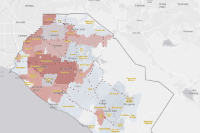

In [81]:
item


In [86]:
df = flayer.query(where="nearbyPlace = 'Irvine'", as_df=True)
len(df)


51

In [87]:
len(sdf)


282

In [88]:
sdf["nearbyPlace"].unique()


<StringArray>
[               'Anaheim',             'Buena Park',           'Garden Grove',
            'Westminster',             'Costa Mesa',              'Santa Ana',
                 'Tustin',                 'Irvine',                 'Orange',
            'Lake Forest',          'Newport Beach',              'Placentia',
              'Fullerton',                   'Brea',    'San Juan Capistrano',
          'Mission Viejo',             'Seal Beach',           'Los Alamitos',
           'San Clemente',       'Capistrano Beach',        'Fountain Valley',
         'Trabuco Canyon', 'Rancho Santa Margarita',         'Foothill Ranch',
              'Silverado',            'Yorba Linda',          'Laguna Niguel',
           'Laguna Hills',            'Aliso Viejo',           'Laguna Beach',
          'Newport Coast',               'La Habra']
Length: 32, dtype: string

In [96]:
sdf["nearbyPlace"].value_counts()


nearbyPlace
Irvine                    51
Anaheim                   33
Orange                    19
Costa Mesa                14
Fullerton                 13
Brea                      13
Westminster               11
Santa Ana                 10
Tustin                     9
San Juan Capistrano        9
Mission Viejo              9
Buena Park                 8
Garden Grove               8
Foothill Ranch             8
San Clemente               8
Aliso Viejo                7
La Habra                   6
Fountain Valley            5
Newport Beach              5
Newport Coast              5
Seal Beach                 5
Silverado                  4
Laguna Niguel              4
Los Alamitos               3
Rancho Santa Margarita     3
Lake Forest                3
Capistrano Beach           2
Trabuco Canyon             2
Yorba Linda                2
Placentia                  1
Laguna Hills               1
Laguna Beach               1
Name: count, dtype: Int64

In [97]:
m1 = gis.map("Orange County, CA")
m1


MapView(layout=Layout(height='400px', width='100%'))

In [103]:
m1.zoom=2
m1.center=[33.6846, -117.8265]


In [112]:
sdf.spatial.plot(map_widget=m1)


True

In [116]:
sdf["postmile"]


0       42.11
1        2.67
2       15.55
3       13.81
4        9.12
        ...  
277     0.567
278     11.44
279    18.309
280    20.193
281    18.362
Name: postmile, Length: 282, dtype: Float64

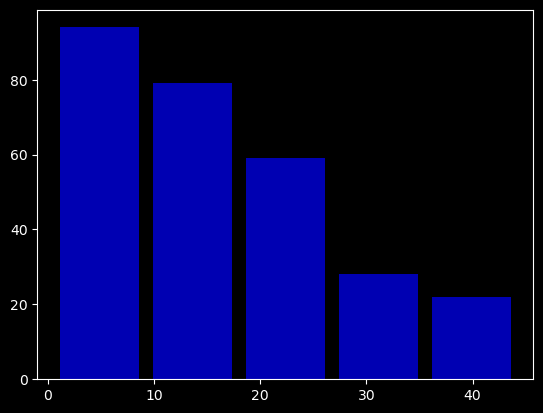

count        282.0
mean     15.982947
std      11.275731
min           0.51
25%           5.98
50%         14.475
75%        22.8875
max         44.255
Name: postmile, dtype: Float64

In [119]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(sdf["postmile"], bins=5, color='blue', alpha=0.7, rwidth=0.85)
plt.show()

sdf["postmile"].describe()

